<a href="https://colab.research.google.com/github/Diishasing/Alzheimer-s-Disease-Classification-using-Deep-CNNs./blob/main/Alzheimer's_Disease_Classification_using_Deep_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
for dirname,_, filename in os.walk('/content/drive/MyDrive/Alzheimer_s_Dataset/train'):
  for file in filename:
    print(os.path.join(dirname, file))
    break


/content/drive/MyDrive/Alzheimer_s_Dataset/train/MildDemented/26 (20).jpg
/content/drive/MyDrive/Alzheimer_s_Dataset/train/ModerateDemented/28 (2).jpg
/content/drive/MyDrive/Alzheimer_s_Dataset/train/NonDemented/nonDem561.jpg
/content/drive/MyDrive/Alzheimer_s_Dataset/train/VeryMildDemented/verymildDem1193.jpg
/content/drive/MyDrive/Alzheimer_s_Dataset/train/VeryMildDemented/VeryMildDemented/27 (25).jpg


In [3]:
print(os.listdir('/content/drive/MyDrive/Alzheimer_s_Dataset/train'))


['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D


In [6]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Alzheimer_s_Dataset/train',
                   output = 'output',
                   seed = 42,
                   ratio = (.7, .1, .2))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 6068 files [02:17, 44.22 files/s] 


In [7]:
BATCH_SIZE = 64

In [8]:
IMG_H, IMG_W = [180, 180] 
TRAIN = tf.keras.preprocessing.image_dataset_from_directory("./output/train",
                                                            seed = 42,
                                                            image_size = (IMG_H, IMG_W),
                                                            batch_size =BATCH_SIZE,)

TEST = tf.keras.preprocessing.image_dataset_from_directory("./output/test",
                                                            seed = 42,
                                                            image_size = (IMG_H, IMG_W),
                                                            batch_size = BATCH_SIZE,)

VALD = tf.keras.preprocessing.image_dataset_from_directory("./output/val",
                                                            seed = 42,
                                                            image_size = (IMG_H,IMG_W),
                                                            batch_size =BATCH_SIZE,)


Found 4246 files belonging to 4 classes.
Found 1217 files belonging to 4 classes.
Found 605 files belonging to 4 classes.


In [9]:
CLASSES = TRAIN.class_names
print(CLASSES)
TRAIN

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

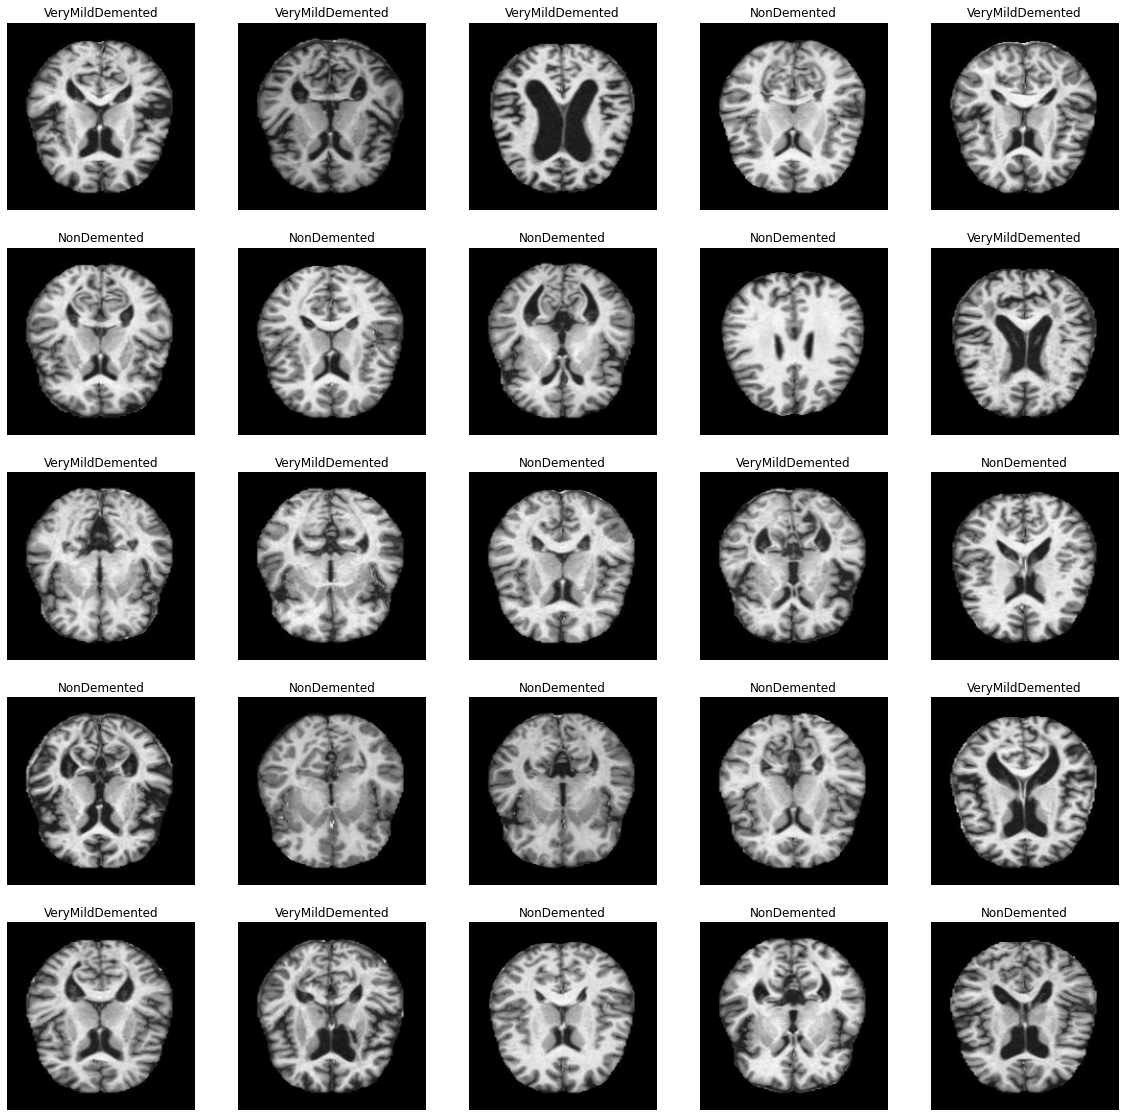

In [30]:
plt.figure(figsize = (20, 20))
import numpy as np

for images, labels in TRAIN.take(1):
  for i in range(25):
    a = plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(CLASSES[labels[i]])
    plt.axis('off')

In [83]:
#Lets build the model using sequential API

model = keras.models.Sequential()
model.add(keras.layers.Rescaling(1.0/255, input_shape = (IMG_H, IMG_W, 3)))
model.add(keras.layers.Conv2D(16, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(4, activation = 'softmax'))


In [84]:
model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate =l_r),
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy'],
  )

In [85]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 dropout_10 (Dropout)        (None, 90, 90, 64)        0         
                                                     

In [39]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('Disease_class.h5', save_best_only = True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                  restore_best_weights = True)

In [86]:
his = model.fit(TRAIN, validation_data = VALD, epochs = 100, batch_size = 64, verbose = 1,  callbacks = [checkpoint, early_stopping])

Epoch 1/100
67/67 [==============================] - 8s 99ms/step - loss: 1.3121 - accuracy: 0.3994 - val_loss: 2.1582 - val_accuracy: 0.5702
Epoch 2/100
67/67 [==============================] - 7s 93ms/step - loss: 0.9654 - accuracy: 0.5782 - val_loss: 0.9243 - val_accuracy: 0.5620
Epoch 3/100
67/67 [==============================] - 7s 93ms/step - loss: 0.8760 - accuracy: 0.5956 - val_loss: 0.9235 - val_accuracy: 0.6364
Epoch 4/100
67/67 [==============================] - 7s 93ms/step - loss: 0.6477 - accuracy: 0.7496 - val_loss: 0.7981 - val_accuracy: 0.7157
Epoch 5/100
67/67 [==============================] - 7s 93ms/step - loss: 0.4164 - accuracy: 0.8683 - val_loss: 0.9033 - val_accuracy: 0.6248
Epoch 6/100
67/67 [==============================] - 7s 94ms/step - loss: 0.2071 - accuracy: 0.9512 - val_loss: 0.5038 - val_accuracy: 0.8595
Epoch 7/100
67/67 [==============================] - 7s 93ms/step - loss: 0.1092 - accuracy: 0.9821 - val_loss: 0.3240 - val_accuracy: 0.9488
Epoch 

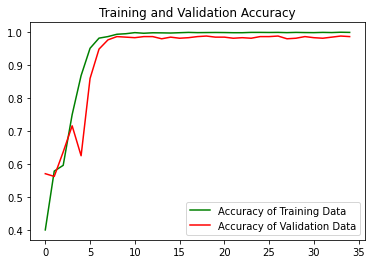

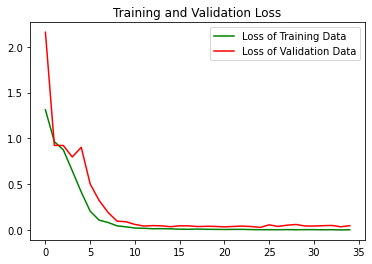

<Figure size 432x288 with 0 Axes>

In [87]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()


In [88]:
loss, accuracy = model.evaluate(TEST)

20/20 [==============================] - 1s 49ms/step - loss: 0.0254 - accuracy: 0.9926


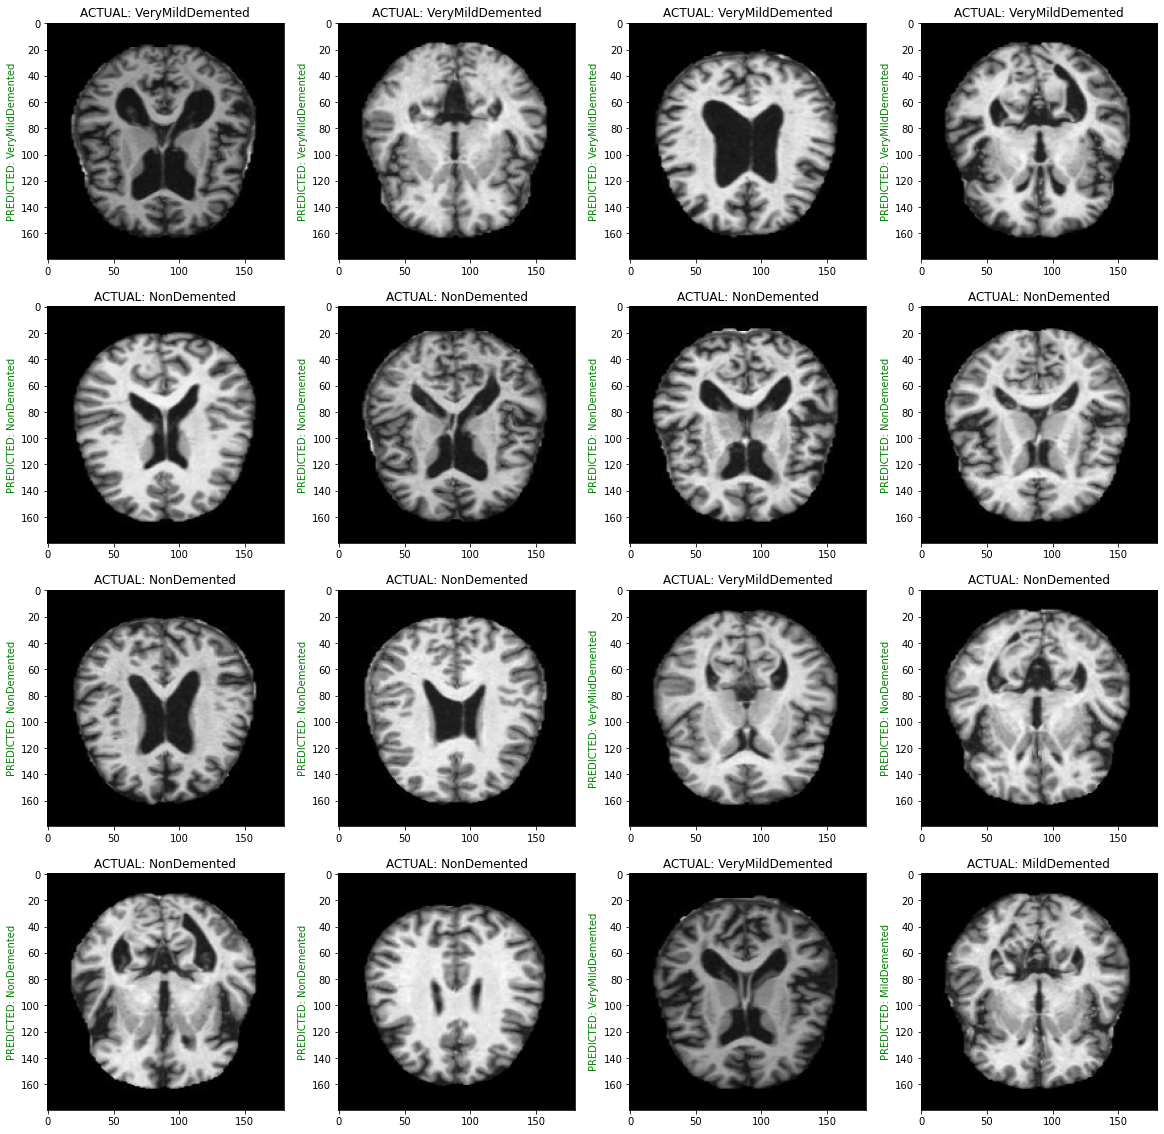

In [89]:
plt.figure(figsize = (20, 20))
for images, labels in TEST.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    pred = model.predict(tf.expand_dims(images[i], 0))
    score = tf.nn.softmax(pred[0])
    if(CLASSES[labels[i]] == CLASSES[np.argmax(score)]):
      plt.title('ACTUAL: ' + CLASSES[labels[i]])
      plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'green'})
    else:
      plt.title('ACTUAL: ' + CLASSES[labels[i]])
      plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'red'})
